1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats, optimize
import matplotlib.pyplot as plt
import pickle

In [2]:
avg = 6.3
alpha = 0.05
x_init = 15
sigma_mu = np.sqrt(avg)
Z = abs(x_init-avg)/sigma_mu
print("Z score: "+str(Z))

Z score: 3.4661629670697414


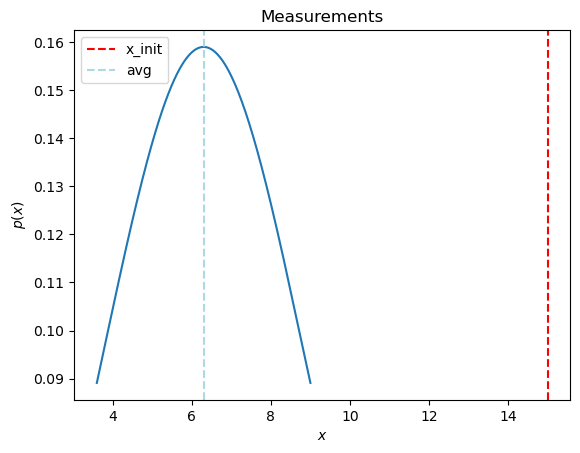

In [3]:
w = avg - x_init
x = np.linspace(avg - w - 6, w + avg + 6, 1000)
y = stats.norm.pdf(x, loc=avg, scale=sigma_mu)
plt.plot(x, y)
plt.axvline(x_init, linestyle='--', color='red', label='x_init')
plt.axvline(avg, linestyle='--', color='lightblue', label = 'avg')
plt.title("Measurements")
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.legend()
plt.show()

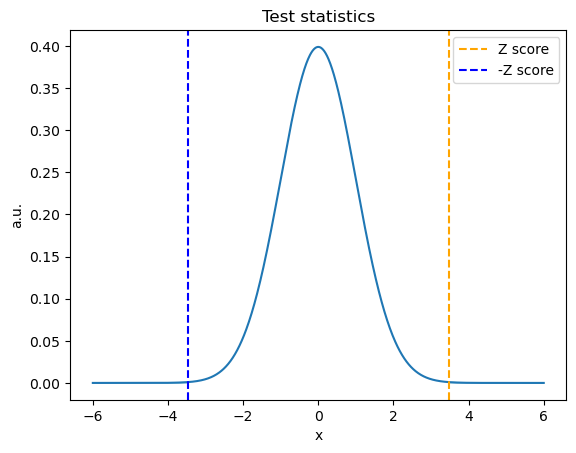

In [4]:
xs = np.linspace(-6, +6, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange', label='Z score')
plt.axvline(-Z, linestyle='--', color='blue', label='-Z score')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("x")
plt.legend()
plt.show()

In [5]:
if (stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))) < (stats.norm.cdf(-3) + (1. - stats.norm.cdf(3))):
    print("Statistically significant")
else:
    print("Not statistically significant")

Statistically significant


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [6]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
n = 10

sigma_pre = np.var(pre, ddof=1)
sigma_post = np.var(post, ddof=1)
sigma = np.sqrt(((sigma_pre)+(sigma_post))/2)

mean_pre = abs(np.mean(pre))
mean_post = abs(np.mean(post))

T = (mean_pre - mean_post) / (sigma * np.sqrt(2/n))
print("T: "+str(T))
p = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("P-value: "+ str(p))

T: -3.786997938137629
P-value: 0.004302464132864604


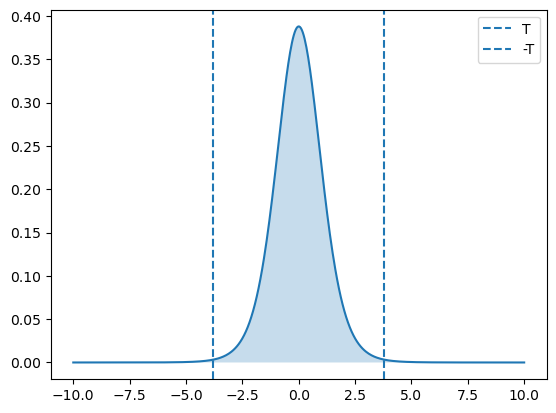

In [7]:
f = np.linspace(-10, 10, 500)
t = stats.t.pdf(f, n - 1)

plt.plot(f, t)
plt.fill_between(f, t, where=(np.abs(f) > np.abs(0)), alpha=0.25)
plt.axvline(T, linestyle='--', label = 'T')
plt.axvline(-T, linestyle='--', label = '-T')
plt.legend()

In [8]:
if p > 0.25:
    print("Statically significant")
else:
    print("Not statically significant")

Not statically significant


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

In [9]:
months = range(1, 13)
max_temps = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
min_temps = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

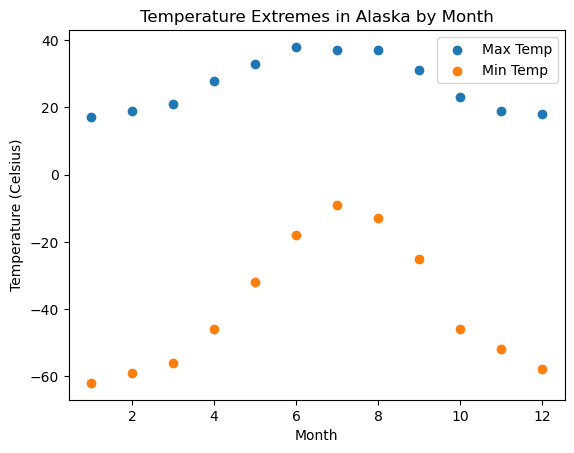

In [10]:
plt.scatter(months, max_temps, label='Max Temp')
plt.scatter(months, min_temps, label='Min Temp')
plt.xlabel('Month')
plt.ylabel('Temperature (Celsius)')
plt.title('Temperature Extremes in Alaska by Month')
plt.legend()
plt.show()

In [11]:
def f_fit(x, A, mean, sigma, o): # gaussian
    return A * np.exp(-(x - mean) ** 2 / (2 * sigma ** 2)) + o

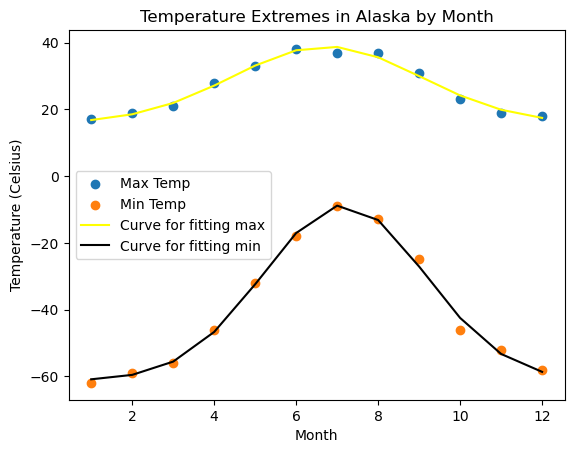

In [12]:
opt_max, cov_max = optimize.curve_fit(f_fit, months, max_temps)
opt_min, cov_min = optimize.curve_fit(f_fit, months,  min_temps)

plt.scatter(months,max_temps, label='Max Temp')
plt.scatter(months,min_temps, label='Min Temp')
plt.plot(months, f_fit(months, opt_max[0], opt_max[1], opt_max[2], opt_max[3]), color = 'yellow', label= 'Curve for fitting max')
plt.plot(months, f_fit(months, opt_min[0], opt_min[1], opt_min[2], opt_min[3]), color = 'black', label= 'Curve for fitting min')
plt.xlabel('Month')
plt.ylabel('Temperature (Celsius)')
plt.title('Temperature Extremes in Alaska by Month')
plt.legend()
plt.show()

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

In [14]:
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2024-01-19 00:21:01--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2024-01-19 00:21:02--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6215bcb1cb79874650a4297c07.dl.dropboxusercontent.com/cd/0/inline/CLl1dw7W7uL5z07TeiyvSmn7Y3MOzb_owdAH8ARVlImF9B8UD86gVNuY-iINCeLHApv64OlEDMzcgTv7Y6QwEPuyE9c1WjKqdjGNTvSK2hqe0uCTk2xTF9WuxRzp_sWAlfQ/file# [following]
--2024-01-19 00:21:03--  https://uc6215bcb1cb79874650a4297c07.dl.dropboxusercontent.com/cd/0/inline/CLl1dw7W7uL5z07TeiyvSmn7Y3MOzb_owdAH8ARVlImF9B8UD86gVNuY-iINCeLHApv64OlEDMzcgTv7Y6QwEPuyE9c1WjKqdjGNTvSK2hqe0uCTk2xTF9WuxRzp_sWAlfQ/fi

In [15]:
with open("./data/residuals_261.pkl", "rb") as f:
    data = pickle.load(f).item()
print(data)

{'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}


In [16]:
df = pd.DataFrame(data, columns=["residuals", "distances"])
df.head()

,residuals,distances
0,1.10,16.0
1,-1.95,6.3
2,-7.20,3.4
3,-4.15,8.4
4,-6.59,1.7


Text(0.5, 1.0, 'Histogram of Residuals')

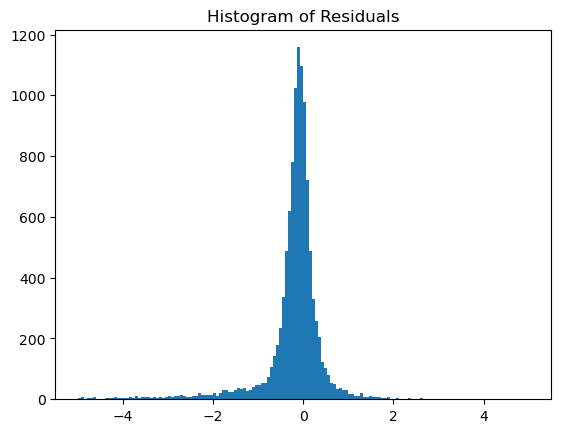

In [17]:
residuals_df = df.residuals
distances_df = df.distances

n, bins, _ = plt.hist(residuals_df, bins=150, range=(-5, 5))
plt.title("Histogram of Residuals")

In [18]:
sigma = np.sqrt(abs(n))
bin_center = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]

In [19]:
def f_fit(x, A, mean, sigma): # gaussian
    return A * np.exp(-(x - mean) ** 2 / (2 * sigma ** 2))

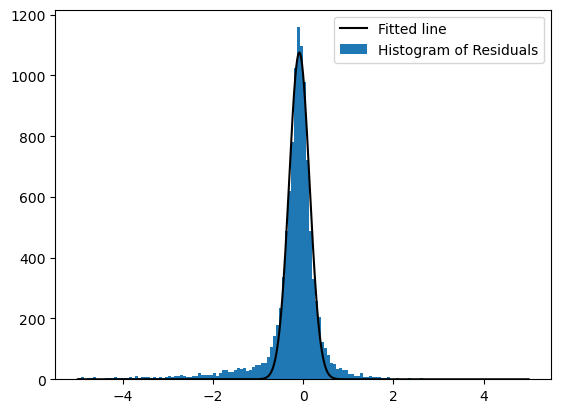

In [20]:
opt_f, cov_f = optimize.curve_fit(f_fit, bin_center, n, p0=[1, 0, 1], full_output=False)
x = np.linspace(-5, 5, 1000)
plt.plot(x, f_fit(x, opt_f[0], opt_f[1], opt_f[2]), color="black", label = "Fitted line")
n, bins, _ = plt.hist(residuals_df, bins=150, range=(-5, 5), label = "Histogram of Residuals")
plt.legend()
plt.show()

# 5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [22]:
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/

--2024-01-19 00:23:05--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [following]
--2024-01-19 00:23:06--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7ab965d3c2497f3526c0e012ce.dl.dropboxusercontent.com/cd/0/inline/CLkbkuYAVFpyPrTsG306qIyqAEVcrG3IgcWwWWBvjWQ1Qoltq2DrcluGmoMOaznFG41YXBCulp3HyPf38lWZC3XbWouEAcwzSAN6LqQA2cEXLj1x-wGNFK9FMjDw6KbKzaE/file# [following]
--2024-01-19 00:23:07--  https://uc7ab965d3c2497f3526c0e012ce.dl.dropboxusercontent.com/cd/0/inline/CLkbkuYAVFpyPrTsG306qIyqAEVcrG3IgcWwWWBvjWQ1Qoltq2

In [23]:
df = pd.read_csv("./data/munich_temperatures_average_with_bad_data.txt", sep = ' ', names = ['years', 'temp'], index_col = False)
df.head()

,years,temp
0,1995.00274,0.944444
1,1995.00548,-1.611110
2,1995.00821,-3.555560
3,1995.01095,-9.833330
4,1995.01369,-10.222200


In [24]:
mask = ((df.years >= 2008) & (df.years <= 2012))
df = df[mask]
df.head()

,years,temp
4748,2008.00274,-2.94444
4749,2008.00548,-2.66667
4750,2008.00821,-2.66667
4751,2008.01095,-2.00000
4752,2008.01369,-1.94444


In [25]:
years = df.years
temp = df.temp

In [26]:
def f(t, a, b, c):
    return (a * np.cos(2*np.pi*t + b) + c)

def g(t, a, b, c, d):
    return (a * np.cos(2*np.pi*t*b + c) + d)

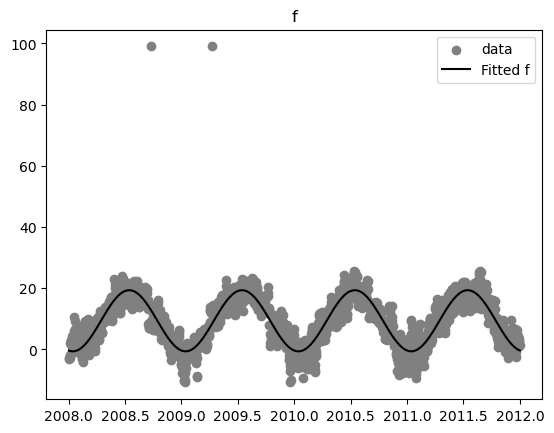

In [27]:
opt_f, cov_f = optimize.curve_fit(f, years, temp, p0=[1, 1, 1])
plt.title('f')
plt.scatter(years, temp, label = 'data', color = 'gray')
plt.plot(years, f(years, opt_f[0], opt_f[1], opt_f[2]), label='Fitted f', color = 'black')
plt.legend()
plt.show()

In [28]:
print("The Best Fit Values of Parameters: " + str(opt_f))
print("The average temperature in Munich: " + str(np.average(temp)))
print('Hottest temp: '+ str(np.abs(opt_f[0])+opt_f[2]))
print('Coldest temp: '+ str(opt_f[0]+opt_f[2]))

The Best Fit Values of Parameters: [-9.98813369 12.33302301  9.38411487]
The average temperature in Munich: 9.384097734976043
Hottest temp: 19.372248557225234
Coldest temp: -0.6040188210437964


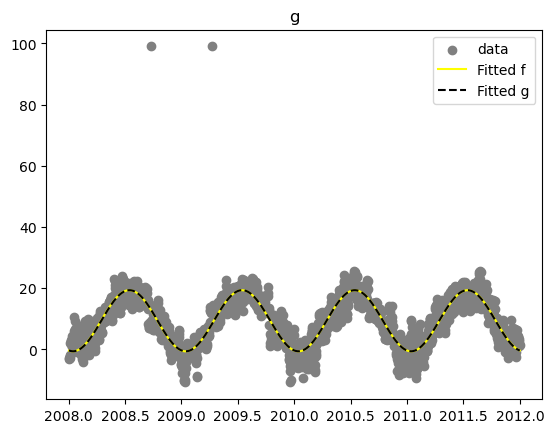

In [29]:
opt_g, cov_g = optimize.curve_fit(g, years, temp, p0=[1, 1, 1, 1])
plt.title('g')
plt.scatter(years, temp, label = 'data', color = "gray")
plt.plot(years, f(years, opt_f[0], opt_f[1], opt_f[2]), label = 'Fitted f', color = 'yellow')
plt.plot(years, g(years, opt_g[0], opt_g[1], opt_g[2], opt_g[3]), label = 'Fitted g', color = 'black', ls = '--')
plt.legend()
plt.show()

In [30]:
print("The Best Fit Values of Parameters: " + str(opt_g))
RSS_f = np.sum(np.square(temp - (f(years,*opt_f))))
print("RSS 1: " + str(RSS_f))
RSS_g=np.sum(np.square(temp - (g(years,*opt_g))))
print("RSS 2: " + str(RSS_g))

The Best Fit Values of Parameters: [-9.98218303  1.00144394 -5.90324422  9.39812379]
RSS 1: 34359.85859996652
RSS 2: 34352.79405393762


In [31]:
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, alpha, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval

In [32]:
ndof_f = 2
ndof_g = 3
pval_1_vs_2 = Ftest(RSS_f, RSS_g, ndof_f, ndof_g, len(years), 0.05, verbose=True)

p-value: 0.584 , additional parameter necessary: NO
